# Hypothesis driven data cleaning on shark attacks

- Hypothesis # 1: Spear-fishers are more frequently attacked than peolpe doing any other activity.

- Hypothesis # 2: Women are less attacked by sharks than men.

- Hypothesis # 3: The more recent the event, the higher the records are.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

TO-DO:

- cross-table


# Previsualization

In [5]:
df = pd.read_csv("input/GSAF5.csv", encoding = 'latin1')
print(df.shape)
df.head()

(5992, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [7]:
#Obtaining null values for every column:

df.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

# 0. Preliminary cleansing

In [8]:
#List of columns
print("Original list of columns:", df.columns)

#List of columns with the same format
df.columns = df.columns.str.title()
df.columns = df.columns.str.strip()

print("The formatted list of columns: ", df.columns)

Original list of columns: Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
The formatted list of columns:  Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator Or Source', 'Pdf', 'Href Formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original Order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [9]:
df['Country and Area'] = df['Country'] +' '+ df['Area']


df.drop(['Unnamed: 22', 'Unnamed: 23', 'Href Formula', 'Pdf'], axis=1, inplace = True) #Unnecessary or redundant data.
df.drop(['Country', 'Area'], axis=1, inplace = True) #Merging two columns

df.head()

,Case Number,Date,Year,Type,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator Or Source,Href,Case Number.1,Case Number.2,Original Order,Country and Area
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,USA Florida
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,USA Florida
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,USA Florida
3,2016.09.17,17-Sep-16,2016,Unprovoked,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,AUSTRALIA Victoria
4,2016.09.15,16-Sep-16,2016,Unprovoked,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,AUSTRALIA Victoria


# Hypothesis # 1: Spear-fishers are more frequently attacked than peolpe doing any other activity.

In [10]:
#In order to know what type of data there is in every column:

print("Type of data in the Activity column:\n", df["Activity"].value_counts())
print("\n\n")
print("Type of data in the Fatality column:\n", df["Fatal (Y/N)"].value_counts())

Type of data in the Activity column:
 Surfing                                            904
Swimming                                           819
Fishing                                            414
Spearfishing                                       321
Bathing                                            153
                                                  ... 
Fishing for tarpon                                   1
Bitten after dhow shipwrecked                        1
The Dwarka foundered                                 1
Fishing / standing in waist deep water               1
The 500-ton coastal trader Polurrian foundered       1
Name: Activity, Length: 1492, dtype: int64



Type of data in the Fatality column:
 N          4315
Y          1552
UNKNOWN      94
 N            8
#VALUE!       1
N             1
n             1
F             1
Name: Fatal (Y/N), dtype: int64


In [11]:
#Creation of functions to standarize the type of data: lowercase, spaces, etc.

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.title() if x.dtype == "object" else x)

In [13]:
#Checking the data has changed:

df["Fatal (Y/N)"].value_counts()

#Faulty values were cluttered in the Y/N category after formatting them.

N          4325
Y          1552
Unknown      94
#Value!       1
F             1
Name: Fatal (Y/N), dtype: int64

In [15]:
activity_death = df[['Activity', 'Fatal (Y/N)']] #New dataframe to use only the memory resources necessary.

#Activity: spearfishing
people_spearfishing = activity_death[(activity_death.Activity == 'Spearfishing')]
print("Total of people spearfishing:", len(people_spearfishing.index))

#Activity: NO spearfishing
people_not_spearfishing = activity_death[(activity_death.Activity != 'Spearfishing')]
print("Total of people not spearfishing:", len(people_not_spearfishing.index))


#Killed
killed = activity_death[(activity_death['Fatal (Y/N)'] == 'Y')]
print("Total of killed people:", len(killed.index))

#Not killed
not_killed = activity_death[(activity_death['Fatal (Y/N)'] == 'N')]
print("Total of non fatal attacks:", len(not_killed.index))
print("Total of attacked people:", len(df.index))

print("\n\n")

death_rate = df['Fatal (Y/N)'].value_counts(normalize=True)
print("The percentage of survivors/deaths/unknown is:", round(death_rate[0]*100),"/",round(death_rate[1]*100), "/", 100-(round(death_rate[0]*100) + round(death_rate[1]*100)))

Total of people spearfishing: 328
Total of people not spearfishing: 5664
Total of killed people: 1552
Total of non fatal attacks: 4325
Total of attacked people: 5992



The percentage of survivors/deaths/unknown is: 72.0 / 26.0 / 2.0


In [16]:
pd.crosstab(activity_death)

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [10]:
#Para obtener el número de personas que han muerto & estaban pescando (Actividad: Spearfishing, Fatalidad: Sí)

killed_spearfishing = activity_death[(activity_death['Activity'] == "Spearfishing") & (activity_death['Fatal (Y/N)'] == "Y")]

print("Personas muertas pescando:", len(killed_spearfishing.index))

#La proporción de personas que murió pescando:

spearfishing_death_rate = (len(killed_spearfishing.index) / len(killed.index))


Personas muertas pescando: 51


In [11]:
#Para obtener el número de personas que han muerto & NO estaban pescando (Actividad: no spearfishing, Fatalidad: Sí)

killed_not_spearfishing = activity_death[(activity_death['Activity'] != "Spearfishing") & (activity_death['Fatal (Y/N)'] == "Y")]
print("Personas muertas no pescando:", len(killed_not_spearfishing.index))

# La proporción de personas que murió haciendo otra actividad:

not_spearfishing_death_rate = (len(killed_not_spearfishing.index)/len(killed.index))

Personas muertas no pescando: 1501


In [12]:
# ¿Es mayor el número de muertes en gente que estaba pescando vs. haciendo otra actividad?

print("El porcentaje de gente que ha muerto pescando es:", round(spearfishing_death_rate, 2) * 100, "%")
print("El porcentaje de gente que ha muerto no pescando es:", (round(not_spearfishing_death_rate, 2)) * 100, "%")

El porcentaje de gente que ha muerto pescando es: 3.0 %
El porcentaje de gente que ha muerto no pescando es: 97.0 %


In [13]:
print("'Es mayor el porcentaje de gente que muere pescando que el que no':", round(spearfishing_death_rate, 2) > (round(not_spearfishing_death_rate, 2)) * 100)

'Es mayor el porcentaje de gente que muere pescando que el que no': False


# Hipótesis 2: Las mujeres sufren menos ataques de tiburones que los hombres.

In [14]:
#De nuevo para ver cómo están registrados los datos:

df['Sex'].value_counts()

M      4837
F       585
.         1
Lli       1
N         1
Name: Sex, dtype: int64

In [15]:
#EL SEXO

#Total
men = df[(df.Sex == 'M')]
women = df[(df.Sex == 'F')]


#Relativo
men_rate = round((len(men.index) / (len(men.index) + len(women.index))) * 100, 2) 
women_rate = round((len(women.index) / (len(men.index) + len(women.index))) * 100, 2)

print("El", men_rate, "% de los ataques fue hacia hombres y el", women_rate, "% hacia mujeres.")

El 89.21 % de los ataques fue hacia hombres y el 10.79 % hacia mujeres.


In [16]:
print("'Las mujeres sufren menos ataques de tiburones que los hombres':", women_rate < men_rate)

'Las mujeres sufren menos ataques de tiburones que los hombres': True


# Hipótesis 3: Los registros de ataques son más frecuentes cuanto más nos acercamos a la actualidad.


In [17]:
#NÚMERO TOTAL DE ATAQUES EN EL S.XX

#Primera mitad del S.XX

first_mid = list(range(1900, 1950))

count_first_mid = 0
primera_mitad = []

for i in first_mid:
    for n in df.Year:
        if i == n:
            count_first_mid+=1
            primera_mitad.append(n)
            
print("Número de ataques en la primera mitad del siglo XX:", count_first_mid, "| Hubo una media de", count_first_mid / 50, "ataques por año.")


#Segunda mitad del S.XX

second_mid = list(range(1951, 1999))

count_second_mid = 0
segunda_mitad = []

for i in second_mid:
    for n in df.Year:
        if i == n:
            count_second_mid+=1
            segunda_mitad.append(n)
            
print("Número de ataques en la segunda mitad del siglo XX:", count_second_mid,"| Hubo una media de", count_second_mid / 50, "ataques por año.")


#Siglo XXI

xxi_century = list(range(2000, 2021))

count_xxi_century = 0
xxi = []

for i in xxi_century:
    for n in df.Year:
        if i == n:
            count_xxi_century+=1
            xxi.append(n)

print("Número de ataques en el siglo XXI:", count_xxi_century,"| Hubo", count_xxi_century / 50, "ataques por año.")

print("\n")

Número de ataques en la primera mitad del siglo XX: 1053 | Hubo una media de 21.06 ataques por año.
Número de ataques en la segunda mitad del siglo XX: 2308 | Hubo una media de 46.16 ataques por año.
Número de ataques en el siglo XXI: 1855 | Hubo 37.1 ataques por año.




In [18]:
#Frecuencia de los ataques según año y mitades de siglo:

from collections import Counter

ataques_segunda = Counter(segunda_mitad)
ataques_primera = Counter(primera_mitad)
ataques_xxi = Counter(xxi)

print(f"Frecuencia de los ataques según año por medio siglo: \n\n {ataques_primera} \n\n {ataques_segunda} \n\n {ataques_xxi}")

Frecuencia de los ataques según año por medio siglo: 

 Counter({1942: 41, 1929: 37, 1935: 32, 1944: 31, 1949: 31, 1936: 30, 1937: 30, 1947: 30, 1931: 29, 1948: 29, 1943: 28, 1932: 27, 1934: 27, 1941: 27, 1928: 26, 1930: 26, 1946: 26, 1916: 25, 1938: 24, 1939: 24, 1940: 24, 1907: 23, 1922: 22, 1933: 22, 1906: 21, 1923: 21, 1926: 21, 1924: 19, 1927: 19, 1909: 18, 1914: 17, 1905: 16, 1911: 16, 1913: 16, 1945: 16, 1902: 15, 1920: 15, 1910: 14, 1919: 14, 1925: 14, 1900: 13, 1904: 13, 1908: 13, 1912: 13, 1915: 12, 1917: 11, 1921: 11, 1903: 10, 1901: 9, 1918: 5}) 

 Counter({1959: 93, 1960: 93, 1962: 86, 1961: 78, 1995: 76, 1964: 66, 1998: 65, 1963: 61, 1996: 61, 1966: 58, 1997: 57, 1992: 56, 1993: 56, 1994: 56, 1988: 55, 1958: 54, 1989: 53, 1956: 51, 1965: 51, 1983: 50, 1975: 49, 1981: 49, 1967: 48, 1968: 46, 1955: 43, 1954: 42, 1970: 42, 1957: 41, 1984: 41, 1982: 40, 1976: 39, 1986: 39, 1974: 38, 1990: 38, 1991: 38, 1985: 37, 1953: 36, 1972: 35, 1980: 35, 1987: 35, 1951: 31, 1969: 30, 1952

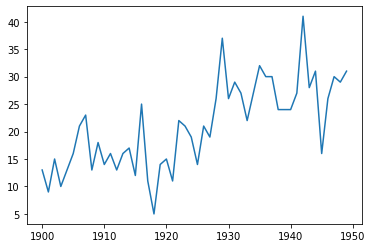

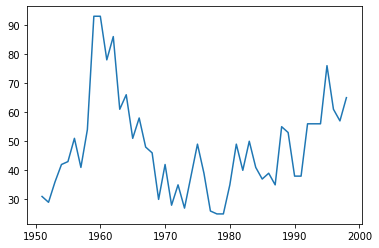

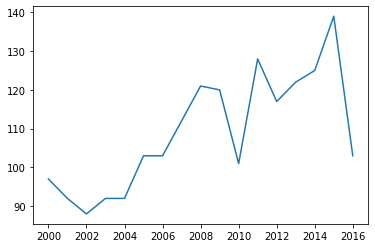

In [19]:
#De forma gráfica:

plt.plot(*zip(*sorted(Counter(primera_mitad).items())))
plt.show()

plt.plot(*zip(*sorted(Counter(segunda_mitad).items())))
plt.show()

plt.plot(*zip(*sorted(Counter(xxi).items())))
plt.show()

In [20]:
print("'Los registros de ataques son más frecuentes cuanto más nos acercamos a la actualidad':",count_first_mid < count_second_mid < count_xxi_century)

'Los registros de ataques son más frecuentes cuanto más nos acercamos a la actualidad': False


In [21]:
#Exportamos el archivo con las modificaciones:

df.to_csv("output/sharks-cleanfile.csv", encoding="latin1")